In [1]:
import math
import random
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [2]:
fx = lambda x: ((15 * x**3 + 21 * x**2 + 41 * x + 3)**0.25) * math.exp(-0.5*x)
a = 1
b = 4
step = 100

In [3]:
def approx_integration(n, a, b, fx):
    sum = 0
    for i in range(n):
        xi = random.uniform(a, b)
        sum += fx(xi)
    return (1/n) * (b-a) * sum
        
def compare(fx, a, b, n):
    
    res2 = scipy.integrate.quad(fx, a, b)
    closet_idx = 0
    loop_idx = 0
    diff = 1000000000
    
    arr = []
    for current_step in range(n, 10000 + n, n ):
        temp = approx_integration(current_step, a, b, fx)
        print("current_step ", current_step, " res ", temp)
        arr.append(temp)
        
        if abs(temp - res2[0]) < diff:
            diff = abs(temp - res2[0])
            closet_idx = loop_idx
        loop_idx += 1
    
    print("scipy integrate ", res2)
    print("closet index ", closet_idx, " with n ", (closet_idx+1) * n, " with val ", arr[closet_idx])
    
    return arr, res2, closet_idx #not sure if this method of getting best n is correct (should we get it from 1/sqrt(n) instead?)



current_step  100  res  3.9957214961056997
current_step  200  res  4.034835301641474
current_step  300  res  4.024731165047463
current_step  400  res  3.9595583036794784
current_step  500  res  4.024254588045008
current_step  600  res  3.985218155461401
current_step  700  res  4.064978046308687
current_step  800  res  4.022151886646268
current_step  900  res  3.989110503417511
current_step  1000  res  4.0215881577310535
current_step  1100  res  3.973220494975552
current_step  1200  res  3.982570428588324
current_step  1300  res  3.9662291797038876
current_step  1400  res  4.0064056671090755
current_step  1500  res  4.0277764689198525
current_step  1600  res  4.010294881926817
current_step  1700  res  4.002280751340038
current_step  1800  res  4.024730911798858
current_step  1900  res  3.983436247298974
current_step  2000  res  3.984736161298386
current_step  2100  res  4.033907207964092
current_step  2200  res  3.995332235676569
current_step  2300  res  3.989715148674673
current_step  

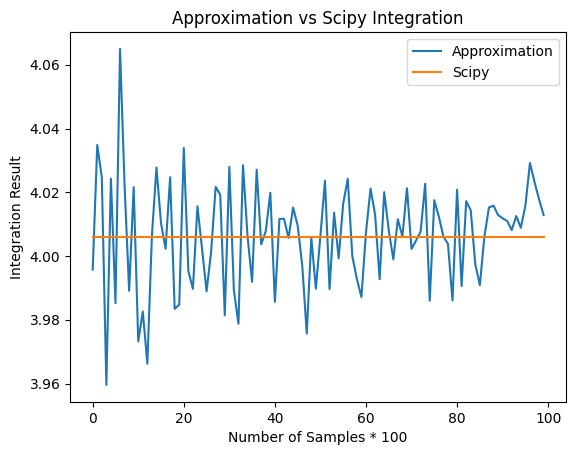

In [4]:
#req 1
arr, res2, closet_idx = compare(fx, a, b, step)  

# Plot the results on the same graph
plt.plot(arr, label="Approximation")
plt.plot([res2[0]] * len(arr), label="Scipy")
plt.title("Approximation vs Scipy Integration")
plt.xlabel(f"Number of Samples / {step}")
plt.ylabel("Integration Result")
plt.legend()
plt.show()

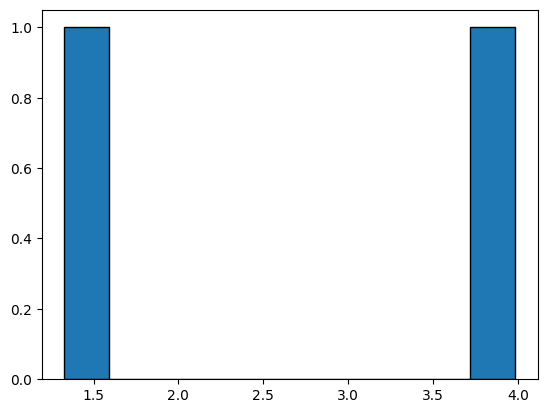

req2 stddev  1.327703949968876


In [5]:
#req 2 #NOT DONE
step = 1000
lst = []
for i in range(500):
    t = approx_integration(step, a, b, fx)  
    lst.append([ t/(b-a), t])

fig, ax = plt.subplots()
ax.hist(lst[0], bins=10, edgecolor='black')

# Display the graph
plt.show() 
#histogram isn't done/correct

print("req2 stddev ", np.std(lst[0]))